# The SIR model
### Student ID:2103654 ##

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. 

The basic reproduction ratio is given by $\displaystyle{R_0 = \frac{\beta}{\gamma}}$.

---

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Part A. Baseline case

Here results are shown for specific parameter values: $\beta = 0.3$ and $\gamma = 0.1$, corresponding to $R_0 = 3$. The initial conditions are $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$. So, we start with only 5 infectious individuals in a population of size $N=10^6$. 

The **first plot** below shows the time series of the three variables. Time can be thought of a measured in days so 180 days is about 6 months. The model captures the basics of the disease progression where the number of infectious individuals initially grows (outbreak). Eventually the number of infections individuals reaches a peak and thereafter decreases. 

The **second plot** shows a phase portrait in the $(S,I)$ plane. A *diamond* shows the initial condition, and a *circle* shows the final state. 

The <font color='blue'>blue</font> square indicates the point where the number of infections are at their *maximum*. The plots show a different view of the disease progression.


In [2]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# --- Problem setup --- #

# Set initial conditions and put into array y0
S0 = 10.0**6 -5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)


In [4]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

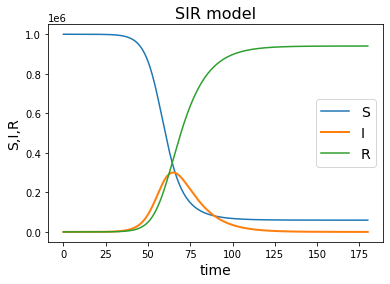

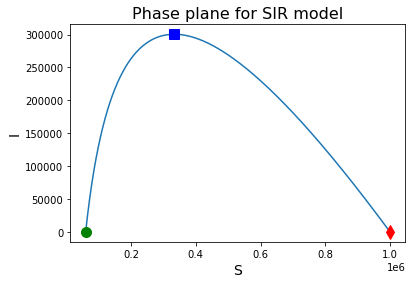

At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=180) = 59531
I(t=180) = 51
R(t=180) = 940418
The maximum value of I is 300464 this occurs when S is [332721.02710906]


In [5]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)


# finding maximum I value using np.amax
# I use np.where to find the index of where I is at its maximum to later find the corresponding value for S
Imax=np.amax(I)
tmax=np.where(I==Imax)

# plotting the max value of I in the phase portrait
plt.plot(S[tmax],I[tmax], 'bs', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=180) =", round(S[-1]))
print("I(t=180) =", round(I[-1]))
print("R(t=180) =", round(R[-1]))
print("The maximum value of I is", round(Imax), "this occurs when S is", S[tmax])

Note that at the final time, there are some individuals who did not contract the disease since $S_{t=180} = 59531 > 0$.


## Part B. Prior immunity

The following illustrates how prior immunity flattens the curve. This is done by solving the ODE given two cases: one with prior immunity and the other being the baseline case.

For the prior immunity case, I have chosen initial value $R(0)=200000$, representing 200000 members of the population having prior natural immunity or perhaps they have been vaccinated. These members are not susceptible to infection at the start of the disease outbreak. $I(0) = 5$ as before. 

The **first plot** below is a time series comparing the baseline case and prior immunity case. 

The **second plot** shows a phase portrait. I have used a <font color='blue'>blue square</font> to indicate the point where $I$ reaches its maximum in both cases. 

The **third plot** shows the time series for $I(t)$ with and without prior immunity. By excluding $S(t)$ and $R(t)$, the comparison between the two infection curves is clearer. We see that by having prior immunity, we have flattened the curve.

In each case, the dotted curves represent the baseline case (no prior immunity) and the solid curves represent the prior immunity case.


In [6]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [7]:
# --- Problem setup --- #
# Baseline case: Set initial conditions and put into array y0
S0 = 10.0**6 -5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

# Prior immunity case: Set initial conditions and put into array y0_im
N_im = 10**6
I0_im = 5
R0_im = 200000
S0_im=N_im-I0_im-R0_im
y0_im = np.array([S0_im, I0_im, R0_im])

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

In [8]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol_base = odeint(SIR, y0, t)
y_sol_im = odeint(SIR, y0_im, t)

# extract S, I, R from the solution array y
S_base = y_sol_base[:,0]
I_base = y_sol_base[:,1]
R_base = y_sol_base[:,2]

S_im = y_sol_im[:,0]
I_im = y_sol_im[:,1]
R_im = y_sol_im[:,2]

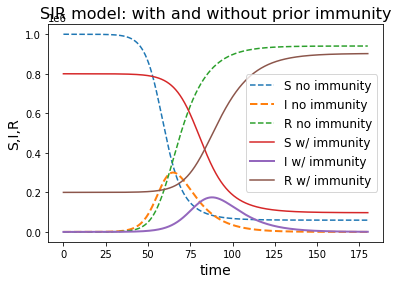

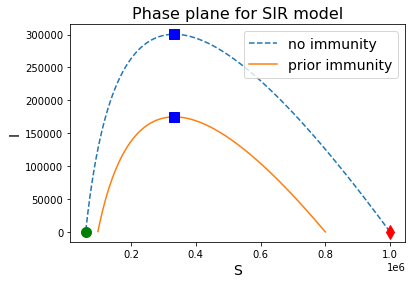

For the baseline case: 
 At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=180) = 59531
I(t=180) = 51
R(t=180) = 940418
The maximum value of I is 300464 this occurs when S is [332721.02710906] 

For the prior immunity case: 
 At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=180) = 97384
I(t=180) = 635
R(t=180) = 901982
The maximum value of I is 174846 this occurs when S is [332927.12990883] 

The reduction in the maximum value of I is 125618 



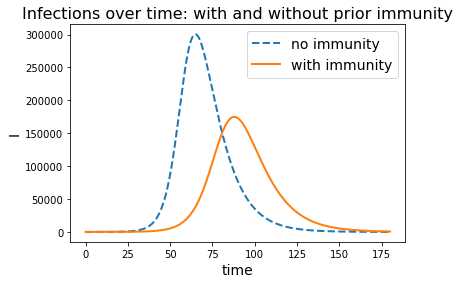

YAY the curve has been flattened!


In [9]:
# --- Plot various interesting things --- #
#TIME SERIES PLOT
# plot baseline case's time evolution of the S, I, R
plt.plot(t, S_base,'--', label="S no immunity")
plt.plot(t, I_base, '--', lw = 2, label="I no immunity")
plt.plot(t, R_base, '--', label="R no immunity")

# plot prior immunity case's time evolution of the S, I, R
plt.plot(t, S_im, label="S w/ immunity")
plt.plot(t, I_im, lw = 2, label="I w/ immunity")
plt.plot(t, R_im, label="R w/ immunity")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model: with and without prior immunity", fontsize=16)
plt.legend(fontsize=12)
plt.show()        


# PHASE PORTRAIT PLOT
# plot the evolution in the S,I phase plane
plt.plot(S_base, I_base,'--',label="no immunity")
plt.plot(S_im,I_im,label="prior immunity")

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)
plt.legend(fontsize=14)

# put some markers to show initial and final states
plt.plot(S_base[0], I_base[0], 'rd', markersize = 10)
plt.plot(S_base[-1], I_base[-1], 'go', markersize = 10)

# finding and plotting max I of baseline case using np.amax
# again I use np.where to find the index of where I is at its maximum to later find the corresponding value for S
Imax=np.amax(I_base)
tmax=np.where(I_base==Imax)
plt.plot(S_base[tmax],I_base[tmax], 'bs', markersize = 10)

# finding and plotting max I of prior immunity case
Imax_im=np.amax(I_im)
tmax_im=np.where(I_im==Imax_im)
plt.plot(S_im[tmax_im],I_im[tmax_im], 'bs', markersize = 10)

plt.show()

# --- Report the final values of S, I, R.  --- #
# baseline case
print("For the baseline case:", "\n","At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=180) =", round(S_base[-1]))
print("I(t=180) =", round(I_base[-1]))
print("R(t=180) =", round(R_base[-1]))
print("The maximum value of I is", round(Imax),"this occurs when S is", S[tmax],"\n")

# prior immunity case
print("For the prior immunity case:","\n","At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=180) =", round(S_im[-1]))
print("I(t=180) =", round(I_im[-1]))
print("R(t=180) =", round(R_im[-1]))
print("The maximum value of I is", round(Imax_im),"this occurs when S is", S_im[tmax_im],"\n")
print("The reduction in the maximum value of I is", round(Imax-Imax_im),"\n")

# third extra plot: comparing infection curves 
plt.plot(t, I_base, '--', lw = 2, label="no immunity")
plt.plot(t, I_im, lw = 2, label="with immunity")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Infections over time: with and without prior immunity", fontsize=16)
plt.legend(fontsize=14)

plt.show()
print("YAY the curve has been flattened!")


## Part C. Social distancing


We model social distancing, or a mask mandate, by varying the parameter $\beta$ that controls the rate of infection. We will use the following simple approximation. When a mask mandate is in effect, the parameter $\beta$ will be reduced to 0.24, otherwise it will be 0.3, as in the baseline case. More specifically, we will consider $\beta$ to change between these two values according to:

$$
\beta = 0.3 \quad {\rm if} \quad t \le t_{m} \\
\beta = 0.24 \quad {\rm if} \quad t_{m} < t \le t_{m}+30 \\
\beta = 0.3 \quad {\rm if} \quad t_{m}+30 < t 
$$

$t_m$ corresponds to the time the mask mandate goes into effect. We consider a 30-day mandate period and so $t_m+30$ corresponds to the time the mask mandate is lifted. 

Here, I use the value of $t_m$ that gives the smallest value for maximum value of $I$, i.e., finding the point in time (the 43rd day) that most flattens the curve. I have plotted this solution alongside the baseline case.

Our initial conditions for the baseline case are $\gamma = 0.1$ and $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$.

The **first plot** is a time series of the SIR model and the **second plot** is a phase portrait. In each case we can compare the effect of the mask mandate with the baseline case.

On the phase portrait, the <font color='blue'>blue square</font> indicates the points on each trajectory where $I$ reaches its maximum. Notice that with the mask mandate the maximum value of I has been reduced.

The **third plot** shows the time series for $I(t)$ with and without the mask mandate. The comparison between the two infection curves is clearer. We can see that we have indeed flattened the curve :)

In [10]:
# --- First define the RHS of ODE system --- #
# baseline case
def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

# mask mandate case
def SIR2(y2, t):
    # returns RHS of the SIR model
    S2, I2, R2 = y2
    
    t_m = 43
    beta2 = 0.24 if t_m < t and t <= t_m + 30 else 0.3
    gamma2 = 0.1
    
    N2 = S2 + I2 + R2
    Sdot2 = -beta2 * S2 * I2 / N2
    Idot2 = beta2 * S2 * I2 / N2 - gamma2 * I2
    Rdot2 = gamma2 * I2
    
    return Sdot2, Idot2, Rdot2

In [11]:
# --- Problem setup --- #

# Set initial conditions and put into array y0
S0 = 10.0**6 -5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

In [12]:
# --- Call the ODE solver and extract solutions for both cases --- #
  
y_sol = odeint(SIR, y0, t)
y_sol_mask = odeint(SIR2, y0, t)

# extract S, I, R from the solution array y (baseline case)
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

#extract S2, I2, R2 from the solution array y2 (mask mandate case)
S2 = y_sol_mask[:,0]
I2 = y_sol_mask[:,1]
R2 = y_sol_mask[:,2]

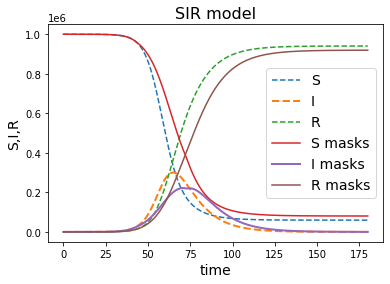

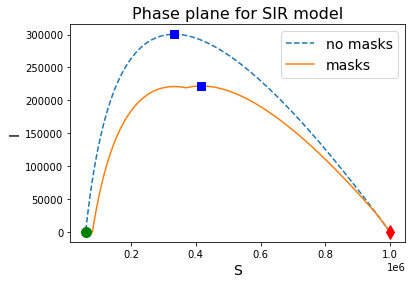

Without the mask mandate: 
 At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=180) = 59531
I(t=180) = 51
R(t=180) = 940418
The maximum number of infections without the mask mandate is 300464 this occurs when S is [332721.02710906] 

With the mask mandate: 
 At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=180) = 80500
I(t=180) = 174
R(t=180) = 919326
The maximum number of infections with the mask mandate is 221851 this occurs when S is [416101.56122502] 

The reduction in the maximum value of I is 78613 



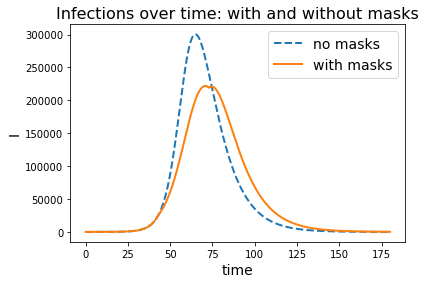

In [13]:
 # --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, '--', label="S")
plt.plot(t, I, '--', lw = 2, label="I")
plt.plot(t, R, '--', label="R")

# plot the time evolution of the S, I, R with mask mandate
plt.plot(t, S2,label="S masks")
plt.plot(t, I2,lw = 2, label="I masks")
plt.plot(t, R2,label="R masks")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I, '--',label= "no masks")
plt.plot(S2,I2, label = "masks")

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.legend(fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)

# finding the max of baseline case
Imax=np.amax(I)
# I use np.where to find the index of where I is at its maximum to later find the corresponding value for S
tmax=np.where(I==Imax)

# max of mask mandate case
Imax_mask=np.amax(I2)
tmax_mask=np.where(I2==Imax_mask)

# plotting max point in both cases
plt.plot(S[tmax],I[tmax], 'bs', markersize = 8)
plt.plot(S2[tmax_mask],I2[tmax_mask], 'bs', markersize = 8)
plt.show()

# --- Report the final values of S, I, R.  --- #
#baseline case
print("Without the mask mandate:", "\n","At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=180) =", round(S[-1]))
print("I(t=180) =", round(I[-1]))
print("R(t=180) =", round(R[-1]))
print("The maximum number of infections without the mask mandate is", round(Imax),"this occurs when S is", S[tmax],"\n")

#prior immunity case
print("With the mask mandate:","\n","At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=180) =", round(S2[-1]))
print("I(t=180) =", round(I2[-1]))
print("R(t=180) =", round(R2[-1]))

print("The maximum number of infections with the mask mandate is", round(Imax_mask),"this occurs when S is", S2[tmax_mask],"\n")

print("The reduction in the maximum value of I is", round(Imax) - round(Imax_mask),"\n")

# third extra plot: comparing infection curves 
plt.plot(t, I,'--', lw = 2, label="no masks")
plt.plot(t, I2, lw = 2, label="with masks")
# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Infections over time: with and without masks", fontsize=16)
plt.legend(fontsize=14)

plt.show()

A mask mandate is most effective being implemented on the 43rd day. This reduced the peak number of infections by 78613! This would alleviate some of the pressure on the healthcare system and hopefully mean overcoming a pandemic would be more manageable.

---